Life Cycle of Machine Learning Project

* Understanding the probelm Statement
* Data Collection
* Data Checks to perform
* Exploratory data Analysis(EDA)
* Data Pre-processing
* Model Training
* Choose best Model

1.*Probelm Statement*

Problem understands how the student's performance (test score) is affected by other variables such as Gender,Ethnicity,arental level of education, Lunch and Test preparation course.

2.*Data Collection*

* collected from Kaggle - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetld=74977

* Data Consists of 8 colunms and 1000 rows

3. Importing required libraries,packages,_DATA_

In [70]:
import numpy as np 
import pandas as pd

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [71]:
df=pd.read_csv(r'P:\Data Anaysis\data\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [72]:
df.shape

(1000, 8)

3. _Data Checks to Perform_

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* check statistical of dataset
* check vaarious categories present in the different categorical column

3.1 Check Missing values

In [73]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Observations

There is no missing values in the dataset

3.2 Check Duplicates

In [74]:
df.duplicated().sum()

0

There are no duplicates values in the dataset

3.3 Check data type

In [75]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [76]:
#checks null and duplicate values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Check the number of unique values of each column

In [77]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

3.5 check statistical of dataset

In [78]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


3.6 check various categories present in the different categorical column

In [79]:
print("Categories in 'gender' variables: ",end=" " )
print(df['gender'].unique())
print()
print("Categories in 'race/ethnicity' variables: ",end=" " )
print(df['race/ethnicity'].unique())
print()
print("Categories in 'parental level of education' variables: ",end=" " )
print(df['parental level of education'].unique())
print()
print("Categories in 'lunch' variables: ",end=" " )
print(df['lunch'].unique())
print()
print("Categories in 'test preparation course' variables: ",end=" " )
print(df['test preparation course'].unique())
print()


Categories in 'gender' variables:  ['female' 'male']

Categories in 'race/ethnicity' variables:  ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental level of education' variables:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variables:  ['standard' 'free/reduced']

Categories in 'test preparation course' variables:  ['none' 'completed']



obs : Here are the Unique Values of Each Variables

In [80]:
df['total_scores'] = df['math score']+df['reading score']+df['writing score']
df['average'] = df['total_scores']/3
df.iloc[0:2]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_scores,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


 Adding columns for "Total Score" and "Average"

In [81]:
#define numerical and catogorical feature
numercial_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
catagorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print("we have {} numberical columns : {}".format(len(numercial_feature),numercial_feature,))
print("we have {} catagorical features : {}".format(len(catagorical_feature),catagorical_feature))

we have 5 numberical columns : ['math score', 'reading score', 'writing score', 'total_scores', 'average']
we have 5 catagorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [82]:
reading_full = df[df['reading score']==100]['gender'].count()
writing_full = df[df['writing score']==100]['gender'].count()
math_full = df[df['math score']==100]['gender'].count()

print(f"The number of students with full marks in reading skils : {reading_full}")
print(f"The number of students with full marks in writing skils : {writing_full}")
print(f"The number of students with full marks in Maths : {math_full}")

The number of students with full marks in reading skils : 17
The number of students with full marks in writing skils : 14
The number of students with full marks in Maths : 7


In [83]:
reading_less_20 = df[df['reading score']<=20]['gender'].count()
writing_less_20 = df[df['writing score']<=20]['gender'].count()
math_less_20    = df[df['math score']<=20]['gender'].count()

print("The Number of student got less than 20 in reading : {}".format(reading_less_20))
print("The Number of students got less than 20 in writing : {}".format(writing_less_20))
print("The Number of Students got less than 20 in Math : {}".format(math_less_20))

The Number of student got less than 20 in reading : 1
The Number of students got less than 20 in writing : 3
The Number of Students got less than 20 in Math : 4


Insights

* From above values we got students have performed the worst in maths
* Best Performance is in reading Section

4 . Exploring Data (Visualization) 

4.1 Visualize average score distribution to make some conclusion.
   
* Histogram
* kernal Distribution Function(KDE)


4.1.1 Histogram & KDE

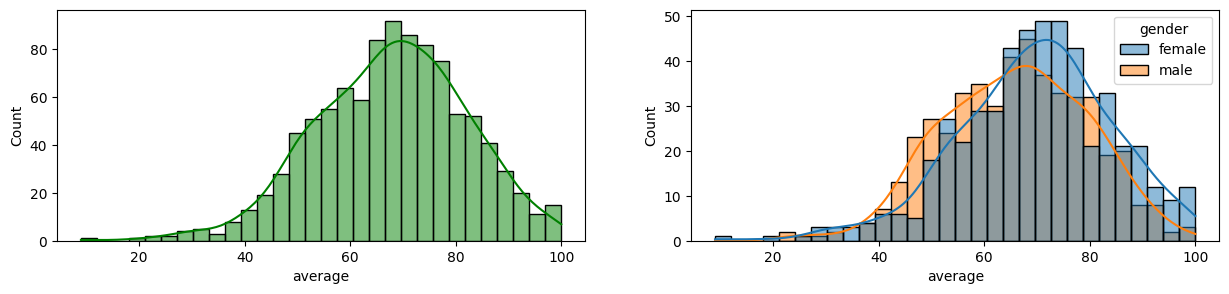

In [84]:

fig, axs =plt.subplots(1,2,figsize=(15,3))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()

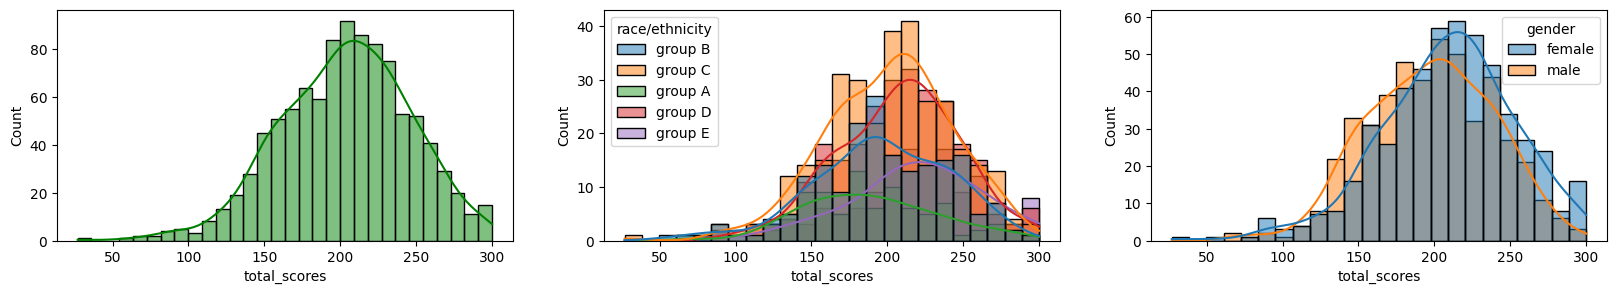

In [85]:
fig,axs = plt.subplots(1,3,figsize=(20,3))
sns.histplot(data=df,x='total_scores',bins=30,kde=True,color='g',ax=axs[0])
sns.histplot(data=df,x='total_scores',kde=True,hue='race/ethnicity',ax=axs[1])
sns.histplot(data=df,x='total_scores',kde=True,hue='gender',ax=axs[2])
plt.show()

#### Insite
* female Students performs well in exams
* gruop C students performs well in exams

In [86]:
fig = make_subplots(rows=1,cols=len(catagorical_feature),subplot_titles=catagorical_feature,specs=[[{'type': 'domain'} for _ in catagorical_feature]])
for i,feature in enumerate(catagorical_feature):
    value_counts = df[feature].value_counts()
    fig.add_trace(go.Pie(labels=value_counts.index,values=value_counts.values,),row=1,col=i+1)
fig.update_layout(height=500,title_text='catagorical_feature',showlegend=False)
pio.show(fig)


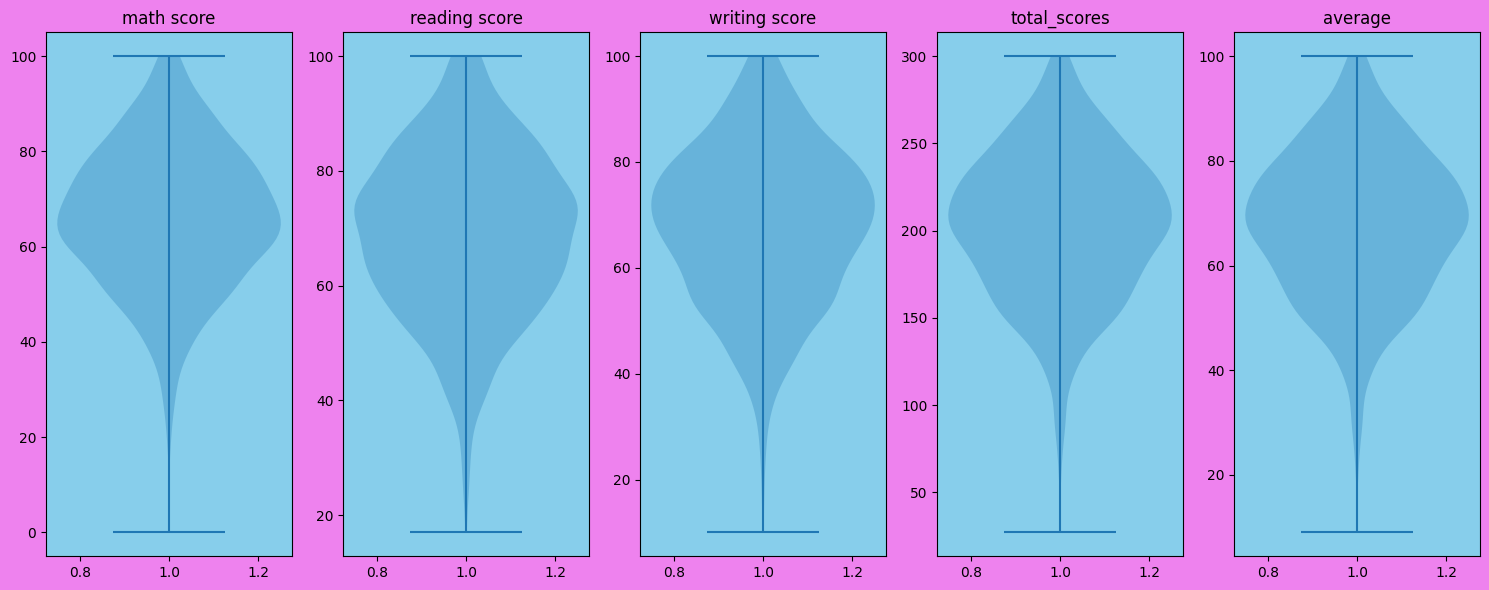

In [126]:
fig,axs=plt.subplots(nrows=1,ncols=len(numercial_feature),figsize=(15,6))

for i,feature in enumerate(numercial_feature):
    ax = axs[i]
    ax.violinplot(df[feature],data=df)
    ax.set_title(feature)
    ax.set_facecolor('skyblue')
fig.set_facecolor('violet')
plt.tight_layout()
plt.show()

### Insights
* From the above graph its clearly visible that most of the students scores are between 60 to 80 in (reading and writing scores) but in math score students scores between 50 to 80 

In [127]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_scores,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [146]:
df.groupby(df['gender']).sum()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_scores,average
gender,,,,,,,,,
female,group Bgroup Cgroup Bgroup Bgroup Bgroup Bgrou...,bachelor's degreesome collegemaster's degreeas...,standardstandardstandardstandardstandardfree/r...,nonecompletednonenonecompletednonenonenonenone...,32962,37611,37538,108111,36037.000000
male,group Agroup Cgroup Bgroup Dgroup Cgroup Dgrou...,associate's degreesome collegesome collegehigh...,free/reducedstandardfree/reducedfree/reducedst...,nonenonenonecompletednonenonecompletednonecomp...,33127,31558,30516,95201,31733.666667
